In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
from torch.utils.data import DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] ='True'
torch.manual_seed(1)

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
Transform = transform.Compose([transform.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data_mnist/',train=True,download=True,transform=Transform)
testset = torchvision.datasets.MNIST(root='./data_mnist/',train=False,download=True,transform=Transform)

trainloader = DataLoader(trainset,batch_size=64,shuffle=True)
testloader = DataLoader(testset,batch_size=64,shuffle=True)

In [4]:
class my_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,10,3)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2))

        self.conv2 = nn.Conv2d(10,16,3)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2))

        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(16*5*5,512)
        self.act3 = nn.ReLU()

        self.fc4 = nn.Linear(512,256)
        self.act4 = nn.ReLU()
        
        self.fc5 = nn.Linear(256,125)
        self.act5 = nn.ReLU()
        
        self.fc6 = nn.Linear(125,10)

        self.cross_ent = nn.CrossEntropyLoss()
    
    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.pool1(x)
        
        x = self.act2(self.conv2(x))
        x = self.pool2(x)
        
        x = self.flat(x)
        
        x = self.act3(self.fc3(x))
        x = self.act4(self.fc4(x))
        x = self.act5(self.fc5(x))
        x = self.fc6(x)
        return x

class my_cnn1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)
        self.act1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32,32,5)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv3 = nn.Conv2d(32,64,5)
        self.act3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=(2,2))
        self.drop3 = nn.Dropout(0.5)

        self.flat = nn.Flatten()

        self.fc4 = nn.Linear(576,256)
        self.act4 = nn.ReLU()
        self.drop4 = nn.Dropout(0.5)

        self.fc5 = nn.Linear(256,10)

        self.cross_ent = nn.CrossEntropyLoss()
    
    def forward(self, x):
        x = self.act1(self.conv1(x))
        
        x = self.act2(self.conv2(x))
        x = self.pool2(x)
        x = self.drop2(x)
        
        x = self.act3(self.conv3(x))
        x = self.pool3(x)
        x = self.drop3(x)
        
        x = self.flat(x)
        
        x = self.act4(self.fc4(x))
        x = self.drop4(x)
        
        x = self.fc5(x)
        return x
    
def Train_(model,Epoch):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    loss_train = []
    epochs = []
    accuracy_train = []
    loss_per_batch = 0
    for epoch in range(1,Epoch+1):
        print('Epoch {} Training...'.format(epoch))
        for input, label in tqdm(trainloader):
            input, label = input.to(device), label.to(device)
            y_hat = model(input).to(device)
            loss = model.cross_ent(y_hat,label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_per_batch += loss.data
        
        print('Calculating Accuracy...')
        acc = 0
        count = 0
        for input, label in testloader:
            input, label = input.to(device), label.to(device)
            y_hat = model(input).to(device)
            acc += (torch.argmax(y_hat,dim=1) == label).float().sum()
            count += len(label)
        acc /= count
        print('Epoch {}: model accuracy {:.2f}%'.format(epoch, acc*100))
        print('--------------------------------------------------------')
        
        epochs.append(epoch)
        accuracy_train.append(acc.cpu().data.numpy().item())
        loss_per_batch /= count
        loss_train.append(loss_per_batch.cpu().data.numpy().item())
    torch.save(model.state_dict(),'cnn_saved_model.pth')
    return epochs, loss_train, accuracy_train

Epoch 1 Training...


100%|██████████| 938/938 [00:10<00:00, 93.31it/s] 


Calculating Accuracy...
Epoch 1: model accuracy 90.93%
--------------------------------------------------------
Epoch 2 Training...


100%|██████████| 938/938 [00:09<00:00, 102.85it/s]


Calculating Accuracy...
Epoch 2: model accuracy 93.95%
--------------------------------------------------------
Epoch 3 Training...


100%|██████████| 938/938 [00:09<00:00, 102.63it/s]


Calculating Accuracy...
Epoch 3: model accuracy 96.05%
--------------------------------------------------------
Epoch 4 Training...


100%|██████████| 938/938 [00:09<00:00, 102.43it/s]


Calculating Accuracy...
Epoch 4: model accuracy 97.10%
--------------------------------------------------------
Epoch 5 Training...


100%|██████████| 938/938 [00:09<00:00, 102.02it/s]


Calculating Accuracy...
Epoch 5: model accuracy 97.49%
--------------------------------------------------------
Epoch 6 Training...


100%|██████████| 938/938 [00:09<00:00, 101.65it/s]


Calculating Accuracy...
Epoch 6: model accuracy 97.88%
--------------------------------------------------------
Epoch 7 Training...


100%|██████████| 938/938 [00:09<00:00, 102.78it/s]


Calculating Accuracy...
Epoch 7: model accuracy 97.81%
--------------------------------------------------------
Epoch 8 Training...


100%|██████████| 938/938 [00:09<00:00, 102.64it/s]


Calculating Accuracy...
Epoch 8: model accuracy 97.86%
--------------------------------------------------------
Epoch 9 Training...


100%|██████████| 938/938 [00:09<00:00, 103.03it/s]


Calculating Accuracy...
Epoch 9: model accuracy 98.41%
--------------------------------------------------------
Epoch 10 Training...


100%|██████████| 938/938 [00:09<00:00, 103.22it/s]


Calculating Accuracy...
Epoch 10: model accuracy 98.37%
--------------------------------------------------------
Epoch 1 Training...


100%|██████████| 938/938 [00:09<00:00, 101.24it/s]


Calculating Accuracy...
Epoch 1: model accuracy 90.46%
--------------------------------------------------------
Epoch 2 Training...


100%|██████████| 938/938 [00:09<00:00, 101.79it/s]


Calculating Accuracy...
Epoch 2: model accuracy 94.00%
--------------------------------------------------------
Epoch 3 Training...


100%|██████████| 938/938 [00:09<00:00, 101.94it/s]


Calculating Accuracy...
Epoch 3: model accuracy 95.70%
--------------------------------------------------------
Epoch 4 Training...


100%|██████████| 938/938 [00:09<00:00, 101.67it/s]


Calculating Accuracy...
Epoch 4: model accuracy 96.34%
--------------------------------------------------------
Epoch 5 Training...


100%|██████████| 938/938 [00:09<00:00, 101.50it/s]


Calculating Accuracy...
Epoch 5: model accuracy 96.65%
--------------------------------------------------------
Epoch 6 Training...


100%|██████████| 938/938 [00:09<00:00, 101.87it/s]


Calculating Accuracy...
Epoch 6: model accuracy 97.08%
--------------------------------------------------------
Epoch 7 Training...


100%|██████████| 938/938 [00:09<00:00, 101.79it/s]


Calculating Accuracy...
Epoch 7: model accuracy 97.52%
--------------------------------------------------------
Epoch 8 Training...


100%|██████████| 938/938 [00:09<00:00, 101.37it/s]


Calculating Accuracy...
Epoch 8: model accuracy 97.44%
--------------------------------------------------------
Epoch 9 Training...


100%|██████████| 938/938 [00:09<00:00, 101.96it/s]


Calculating Accuracy...
Epoch 9: model accuracy 97.83%
--------------------------------------------------------
Epoch 10 Training...


100%|██████████| 938/938 [00:09<00:00, 101.53it/s]


Calculating Accuracy...
Epoch 10: model accuracy 98.14%
--------------------------------------------------------


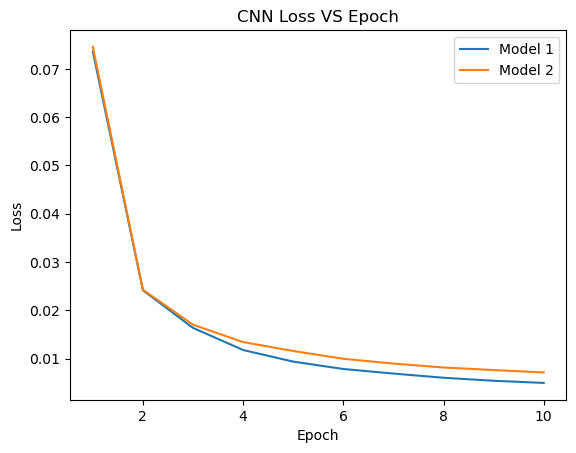

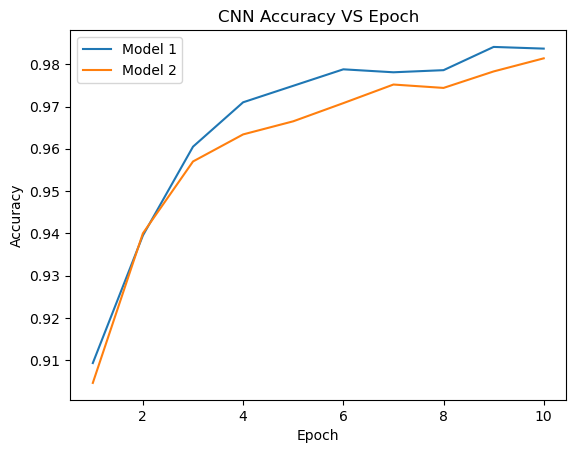

In [5]:
if __name__=='__main__':
    Epoch = 10

    model = my_cnn().to(device)
    epochs, loss_train, accuracy_train = Train_(model,Epoch)
    
    model1 = my_cnn1().to(device)
    epochs1, loss_train1, accuracy_train1 = Train_(model1,Epoch)
    
    plt.plot(epochs, loss_train, label='Model 1')
    plt.plot(epochs1, loss_train1, label='Model 2')
    plt.legend()
    plt.title('CNN Loss VS Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    plt.plot(epochs, accuracy_train, label='Model 1')
    plt.plot(epochs1, accuracy_train1, label='Model 2')
    plt.legend()
    plt.title('CNN Accuracy VS Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()